# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:[https://www.kaggle.com/datasets/dubradave/hospital-readmissions/download?datasetVersionNumber=1](https://www.kaggle.com/datasets/dubradave/hospital-readmissions/download?datasetVersionNumber=1)

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
df= pd.read_csv('hospital_readmissions.csv')
df

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [2]:
#Although i did not find any inconsistencies, I Changed long names to condense the data/improve visual evaluation.
df = df.rename(columns={'time_in_hospital':'days','n_outpatient':'opv','n_inpatient':'inptv','diabetes_med':'diab_med','n_lab_procedures':'nlabs','n_procedures':'nproc','n_medications':'meds','n_emergency':'erv','medical_specialty':'mdtype','glucose_test':'g_test','readmitted':'readmit'})
df

,age,days,nlabs,nproc,meds,opv,inptv,erv,mdtype,diag_1,diag_2,diag_3,g_test,A1Ctest,change,diab_med,readmit
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [3]:
#Would like to analyze categorical data, together with numerical data, to see the big picture.  Will convert categorical data to numerical data
#First convert g_test, A1C,change of meds and diabetes meds values.

df['g_test'].replace(['no','normal','high'],[0,1,2], inplace = True)

#encode the A1Ctest values
df['A1Ctest'].replace(['no','normal','high'],[0,1,2], inplace = True)

#replace the values for "change" (of meds)
df['change'].replace(['no','yes'],[0,1], inplace = True)

#replace the values diabetes_meds to binary as well...
df['diab_med'].replace(['no','yes'],[0,1], inplace = True)

In [4]:
categorical_cols = ['mdtype', 'diag_1', 'diag_2', 'diag_3']

# Create dummy variables for each categorical column
encoded_df = pd.get_dummies(df[categorical_cols], drop_first=False)

# Drop the original categorical columns
df_cat = df.drop(columns=categorical_cols)

# Concatenate the original df and the one-hot encoded columns. df_cat will contain the categorical variables encodings
df_cat = pd.concat([df_cat, encoded_df], axis=1)

In [5]:
df_cat

,age,days,nlabs,nproc,meds,opv,inptv,erv,g_test,A1Ctest,...,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory
0,[70-80),8,72,1,18,2,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,[70-80),3,34,2,13,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,[50-60),5,45,0,18,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,[70-80),2,36,0,12,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,[60-70),1,42,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
24996,[80-90),2,66,0,24,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
24997,[70-80),5,12,0,6,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
24998,[70-80),2,61,3,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df.head()

,age,days,nlabs,nproc,meds,opv,inptv,erv,mdtype,diag_1,diag_2,diag_3,g_test,A1Ctest,change,diab_med,readmit
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,0,0,0,1,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,0,0,0,1,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,0,0,1,1,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,0,0,1,1,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,0,0,0,1,no


In [7]:
# Encode 'age' using ordinal encoding
age_values = [['[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)']]

ordinal_encoder = OrdinalEncoder(categories=age_values)

df_cat['age_encoded'] = ordinal_encoder.fit_transform(df_cat[['age']])


In [8]:
df_cat.drop(columns=['age'], inplace=True)

In [9]:
df_cat.head()

,days,nlabs,nproc,meds,opv,inptv,erv,g_test,A1Ctest,change,...,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,age_encoded
0,8,72,1,18,2,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,3.0
1,3,34,2,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3.0
2,5,45,0,18,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1.0
3,2,36,0,12,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,3.0
4,1,42,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2.0


In [10]:
#encode readmission from categorical to numerical
#df['readmit'].replace(['yes','no'],[1,0],inplace=True)
#df

In [11]:
#df.to_excel('final_hospital_readmissions.xlsx', index=False)

In [12]:
#Comparison of factors that might affect re-admission to the hospital.  On all collected values, patients readmitted had higher number of days in the hospital, more labs done, more medications, and more visits to the doctor prior to re-admission. Is this a statistically significant difference?
df.groupby('readmit').mean()

,days,nlabs,nproc,meds,opv,inptv,erv,g_test,A1Ctest,change,diab_med
readmit,,,,,,,,,,,
no,4.331345,42.625245,1.424204,15.972445,0.258871,0.380190,0.108561,0.076551,0.284690,0.439831,0.744451
yes,4.590778,43.934405,1.271397,16.567892,0.487579,0.881657,0.274545,0.089076,0.265271,0.482985,0.796920


<AxesSubplot:>

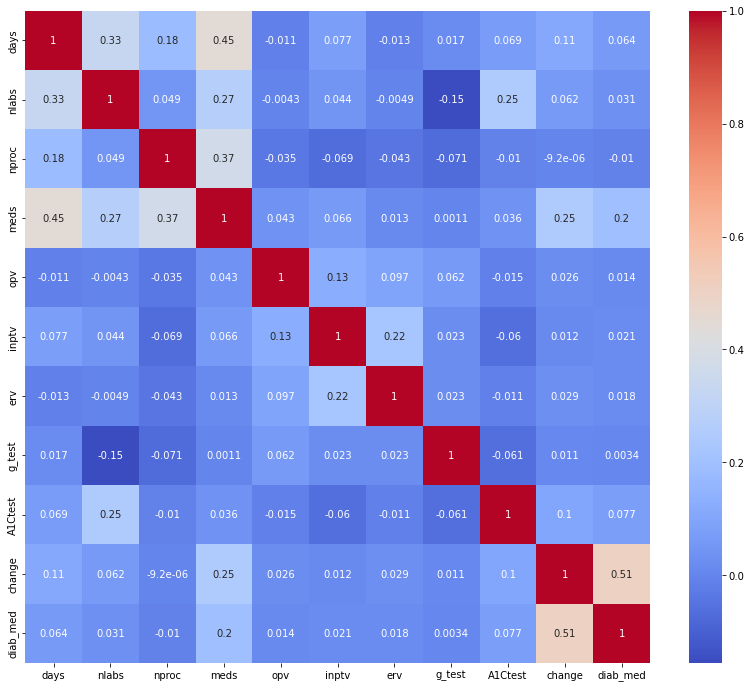

In [13]:
#heatmap
plt.figure(figsize=(14, 12))
corr = df.corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [14]:
# assuming df is your original dataframe and you've computed the correlation matrix
correlation_matrix = df.corr()

# reset index so that the index (the column names of df) becomes a column in correlation_matrix
#correlation_matrix = correlation_matrix.reset_index()

# melt the correlation matrix from wide to long format
#correlation_long = pd.melt(correlation_matrix, id_vars='index', var_name='Measure2', value_name='Correlation')

# rename the 'index' column to 'Measure1'
#correlation_long = correlation_long.rename(columns={'index': 'Measure1'})

# save the long format correlation matrix to a csv file
#correlation_long.to_csv('correlation_matrix_long.csv', index=False)


In [15]:
# assuming df is your original dataframe and you've computed the correlation matrix
correlation_matrix = df.corr()

In [16]:
# reset index so that the index (the column names of df) becomes a column in correlation_matrix
correlation_matrix = correlation_matrix.reset_index()

In [17]:
# melt the correlation matrix from wide to long format
correlation_long = pd.melt(correlation_matrix, id_vars='index', var_name='Measure2', value_name='Correlation')

In [18]:
# rename the 'index' column to 'Measure1'
correlation_long = correlation_long.rename(columns={'index': 'Measure1'})


In [19]:
# save the long format correlation matrix to a csv file
correlation_long.to_csv('correlation_matrix_long.csv', index=False)


In [20]:
#df.to_csv('hosp_readmissions.csv')

In [21]:
#corr.to_csv('correlation_datahosp_readmission.csv')

In [22]:
#datatype null and non-null values.  At a glance, it doesn't indicate that there any null values on this data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       25000 non-null  object
 1   days      25000 non-null  int64 
 2   nlabs     25000 non-null  int64 
 3   nproc     25000 non-null  int64 
 4   meds      25000 non-null  int64 
 5   opv       25000 non-null  int64 
 6   inptv     25000 non-null  int64 
 7   erv       25000 non-null  int64 
 8   mdtype    25000 non-null  object
 9   diag_1    25000 non-null  object
 10  diag_2    25000 non-null  object
 11  diag_3    25000 non-null  object
 12  g_test    25000 non-null  int64 
 13  A1Ctest   25000 non-null  int64 
 14  change    25000 non-null  int64 
 15  diab_med  25000 non-null  int64 
 16  readmit   25000 non-null  object
dtypes: int64(11), object(6)
memory usage: 3.2+ MB


In [23]:
#Although the above query indicates no null values exist, at a glance,there's a category under physician specialty(mdtype) named "missing".  Will explore this further.
df.head(3)

,age,days,nlabs,nproc,meds,opv,inptv,erv,mdtype,diag_1,diag_2,diag_3,g_test,A1Ctest,change,diab_med,readmit
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,0,0,0,1,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,0,0,0,1,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,0,0,1,1,yes


In [24]:
# No duplicate rows from original shape
df = df.drop_duplicates()
df.shape


(25000, 17)

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

<AxesSubplot:>

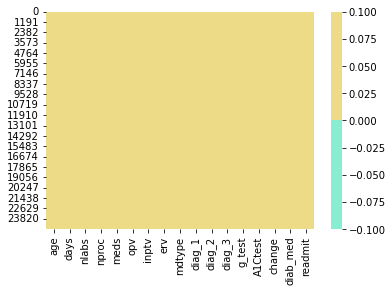

In [25]:
# The heatmap below indicates no data is null.
# yellow is not missing. blue is missing. 17 columns
cols = df.columns[:17] 
colours = ['#88eed2','#eedb88']
sns.heatmap(df[cols].isna(), cmap = sns.color_palette(colours))

In [26]:
# Missing data percentage list! 
#% of missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


age - 0%
days - 0%
nlabs - 0%
nproc - 0%
meds - 0%
opv - 0%
inptv - 0%
erv - 0%
mdtype - 0%
diag_1 - 0%
diag_2 - 0%
diag_3 - 0%
g_test - 0%
A1Ctest - 0%
change - 0%
diab_med - 0%
readmit - 0%


In [27]:
perc = df['readmit'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
# df1 = pd.concat([admn_admy, perc], axis=1, keys=['re-admitted', 'percentage'])
# df1.plot(kind='bar')
perc

no     53.0%
yes    47.0%
Name: readmit, dtype: object

Text(0.5, 1.0, 'Physician Specialties that Admitted Patients')

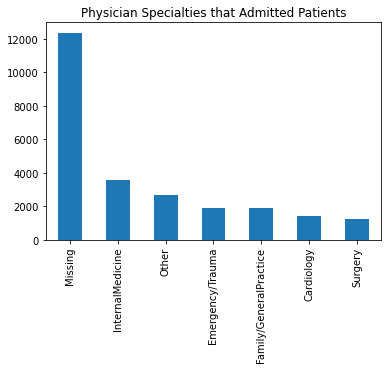

In [28]:
#Get a visual for the physician'specialty that admits the most patients to the hospital. A great number of hospital admissions were done by physicians with "Missing" specialty category. It is possible that this data could give further information about the type of patients or conditions these physicians admit.  Choosing to KEEP this data for further analysis.   
df['mdtype'].value_counts().plot(kind='bar')
plt.title('Physician Specialties that Admitted Patients')

In [29]:
#Comparison of factors that might affect re-admission to the hospital.  On all collected values, patients readmitted had higher number of days in the hospital, more labs done, more medications, and more visits to the doctor prior to re-admission. Is this a statistically significant difference?
#df.groupby('readmit').mean()


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

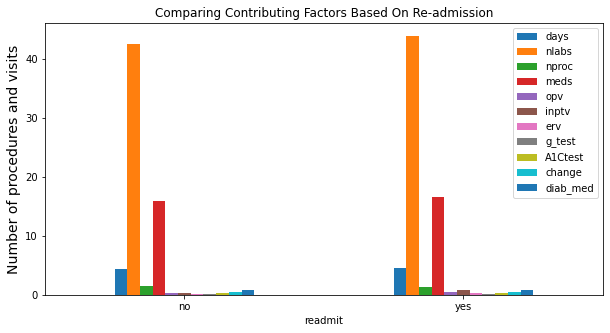

In [30]:
#Visualize the step above...
df.groupby('readmit').mean().plot(kind='bar', figsize= (10,5))
plt.title('Comparing Contributing Factors Based On Re-admission')
plt.ylabel('Number of procedures and visits',fontsize =14)
plt.xticks(rotation = 0)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'InternalMedicine'),
  Text(1, 0, 'Surgery'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Emergency/Trauma'),
  Text(4, 0, 'Family/GeneralPractice'),
  Text(5, 0, 'Missing'),
  Text(6, 0, 'Cardiology')])

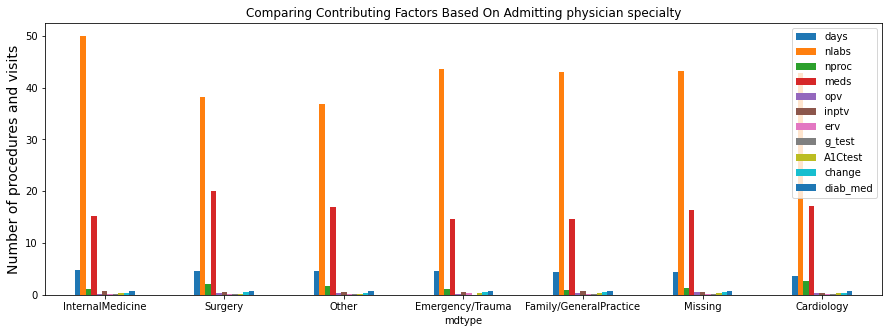

In [31]:
#Visualize the step above...
df.groupby('mdtype').mean().sort_values('days', ascending =False).plot(kind='bar', figsize= (15,5))
plt.title('Comparing Contributing Factors Based On Admitting physician specialty')
plt.ylabel('Number of procedures and visits',fontsize = 14)
plt.xticks(rotation = 0)


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [32]:
#df.describe,identifies a few outliers in the max row. Example: Someone had 64 ER visits prior to hospitalization; Someone had 79 medications, Someone had 114 labs done vs the average of 43.  Will look at these values. 
#dataset statistics
df.describe()

,days,nlabs,nproc,meds,opv,inptv,erv,g_test,A1Ctest,change,diab_med
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600,0.082440,0.275560,0.460120,0.769120
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873,0.361288,0.652536,0.498417,0.421404
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000,2.000000,2.000000,1.000000,1.000000


<AxesSubplot:>

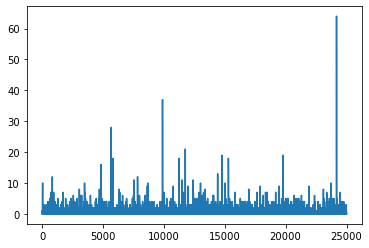

In [33]:
#There is a single incident of someone with over 60 ER visits. This is an outlier.  Will drop it.
df['erv'].plot()

In [34]:
#Located outlier row with > 60 ER visits.  Will drop this row 24177, as it is significantly higher than most.
df.loc[df['erv']== 64]

,age,days,nlabs,nproc,meds,opv,inptv,erv,mdtype,diag_1,diag_2,diag_3,g_test,A1Ctest,change,diab_med,readmit
24177,[60-70),1,1,0,11,2,2,64,Surgery,Respiratory,Other,Other,0,0,0,0,yes


In [35]:
#dropped the row with 64 ER visits, as it is an outlier.
df.drop(df.loc[df['erv']==64].index, inplace = True)
df.shape

(24999, 17)

<AxesSubplot:>

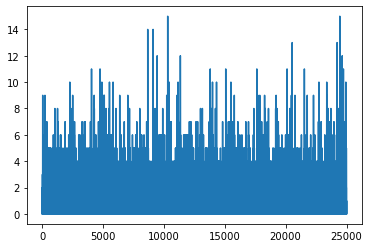

In [36]:
df['inptv'].plot()


In [37]:
#locate outlier row with >30 Outpatient visits
df.loc[df['opv']>30]

,age,days,nlabs,nproc,meds,opv,inptv,erv,mdtype,diag_1,diag_2,diag_3,g_test,A1Ctest,change,diab_med,readmit
10175,[60-70),3,64,0,13,33,0,0,Missing,Digestive,Other,Respiratory,0,0,0,1,yes


<AxesSubplot:>

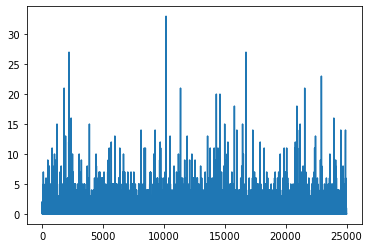

In [38]:
df['opv'].plot()

In [39]:
df.drop(df.loc[df['opv']==

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_61844/797691901.py, line 1)

In [ ]:
df['nlabs'].plot()

In [ ]:
df['days'].plot()

In [ ]:
df['meds'].plot()

In [ ]:
#based on the visualizations above,no other significant outliers were found. 

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [ ]:
#Although there are a lot of "other" diagnosis categories, it provides valuable information in the bigger analysis of hospital admissions.Will keep this data for further analysis.

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [ ]:
#I did not find inconsistencies in my dataset.

## Summarize Your Results

#Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
I did not find duplicate, missing, inconsistent or incorrect.  I did find irregular data: an outliers that i chose to delete from the dataset.
2. Did the process of cleaning your data give you new insights into your dataset?
yes, mostly about the distribution of the data within their categories.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
Half of my data has values and half has categorical values.  Would like to come up with visualizations that tells the most importan part of my dataset and what factors affect hospitalizations the most.